In [1]:
import pandas as pd
import numpy as np
import nltk
import re

#Read file of joined Yelp Business & Review data
df = pd.read_csv('Output_Folder/joined_data_23557.csv')
df.head(5)

business_id                             name  \
0  XQfwVwDr-v0ZS3_CbbE5Xw     Turning Point of North Wales   
1  kxX2SOes4o-D3ZQBkiMRfA                            Zaika   
2  gmjsEdUsKpj9Xxu6pdjH0g       The Voodoo Bone Lady Tours   
3  gebiRewfieSdtt17PTW6Zg  Hibachi Steak House & Sushi Bar   
4  uMvVYRgGNXf5boolA9HXTw           Shalimar Fine Jewelers   

                        address           city state postal_code  \
0           1460 Bethlehem Pike    North Wales    PA       19454   
1                2481 Grant Ave   Philadelphia    PA       19114   
2  201 St Charles Ave, Ste 2560    New Orleans    LA       70170   
3                  502 State St  Santa Barbara    CA       93101   
4             250 Westshore Plz          Tampa    FL       33609   

   review_count               review_id  stars  \
0           169  KU_O5udG6zpxOg-VcAEodg    3.0   
1           181  AqPFMleE6RsU23_auESxiA    5.0   
2           359  6AxgBCNX_PNTOxmbRSwcKQ    5.0   
3           488  pUycOfUwM8vqX7KjRRhUEA    3.0   
4             8  rGQRf8UafX7OTlMNN19I8A    5.0   

                                                text  
0  If you decide to eat here, just be aware it is...  
1  Wow!  Yummy, different,  delicious.   Our favo...  
2  Loved this tour! I grabbed a groupon and the p...  
3  Had a party of 6 here for hibachi. Our waitres...  
4  My experience with Shalimar was nothing but wo...

Sentiment Analysis: https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

In [2]:
df = df[['text','stars']]
df.head()

text  stars
0  If you decide to eat here, just be aware it is...    3.0
1  Wow!  Yummy, different,  delicious.   Our favo...    5.0
2  Loved this tour! I grabbed a groupon and the p...    5.0
3  Had a party of 6 here for hibachi. Our waitres...    3.0
4  My experience with Shalimar was nothing but wo...    5.0

In [3]:
df.shape

(23557, 2)

In [4]:
df=df.dropna()
df = df.reset_index(drop=True)
df.head()

text  stars
0  If you decide to eat here, just be aware it is...    3.0
1  Wow!  Yummy, different,  delicious.   Our favo...    5.0
2  Loved this tour! I grabbed a groupon and the p...    5.0
3  Had a party of 6 here for hibachi. Our waitres...    3.0
4  My experience with Shalimar was nothing but wo...    5.0

In [5]:
df.shape

(14391, 2)

In [6]:
# Label the 4 & 5 star reviews as positive ('1') and 
# label the 1 & 2 star reviews as negative ('0'). 
# Drop the 3 star reviews as they are neutral

df['stars']=df['stars'].astype(int) #convert stars column to int

df=df[df['stars']!=3] #Drop 3-star reviews
df['label']=np.where(df['stars']>=4,1,0) #1-Positive, 0-Negative

df.head()

text  stars  label
1  Wow!  Yummy, different,  delicious.   Our favo...      5      1
2  Loved this tour! I grabbed a groupon and the p...      5      1
4  My experience with Shalimar was nothing but wo...      5      1
5  Locals recommended Milktooth, and it''s an ama...      4      1
6  Love going here for happy hour or dinner!  Gre...      4      1

In [7]:
# Get the number of reviews and group by star rating
df['stars'].value_counts()

5    6785
4    3696
1    1352
2    1041
Name: stars, dtype: int64

In [8]:
df = df.sample(frac=1).reset_index(drop=True) #shuffle
data=df[df['label']==0][:2300]
data=data.append(df[df['label']==1][:10000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data


1    10000
0     2300
Name: label, dtype: int64

text  stars  label
0      Not good! Maybe a bad cook or off night and mo...      1      0
1      This place was awful. I really like Mexican fo...      1      0
2      I took my car to have the left headlight repla...      1      0
3      Rooms were nice and clean.  But staff was unpr...      2      0
4      Eat there about every two weeks and it is eith...      2      0
...                                                  ...    ...    ...
12295  This is a gem. My daughter found some pieces. ...      4      1
12296  Went here on a Saturday night was seated right...      5      1
12297  Mellow Mushroom.... what a cool name!!  And th...      4      1
12298  Love this place. Awesome tacos always friendly...      5      1
12299  Cake Life is one of my favorite bakeries-and I...      5      1

[12300 rows x 3 columns]

Pre-Processing

In [9]:
# Convert all reviews into the lower case
data['pre_process'] = data['text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [10]:
# Perform the Contractions on the reviews text, eg 'it won't be' becomes 'it will not be'
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", " would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))


In [11]:
# Remove non-alpha characters
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [12]:
# Remove the extra spaces between the words
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))


In [13]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [14]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [15]:
data

text  stars  label  \
0      Not good! Maybe a bad cook or off night and mo...      1      0   
1      This place was awful. I really like Mexican fo...      1      0   
2      I took my car to have the left headlight repla...      1      0   
3      Rooms were nice and clean.  But staff was unpr...      2      0   
4      Eat there about every two weeks and it is eith...      2      0   
...                                                  ...    ...    ...   
12295  This is a gem. My daughter found some pieces. ...      4      1   
12296  Went here on a Saturday night was seated right...      5      1   
12297  Mellow Mushroom.... what a cool name!!  And th...      4      1   
12298  Love this place. Awesome tacos always friendly...      5      1   
12299  Cake Life is one of my favorite bakeries-and I...      5      1   

                                             pre_process  
0      good maybe bad cook night thing worth giving s...  
1      place awful really like mexican food place mex...  
2      took car left headlight replaced oct price rea...  
3      room nice clean staff unprofessional uncaring ...  
4      eat every two week either training store kind ...  
...                                                  ...  
12295  gem daughter found piece jus wish size age ran...  
12296  went saturday night seated right away shocked ...  
12297  mellow mushroom cool name restaurant mushroom ...  
12298  love place awesome taco always friendly staff ...  
12299  cake life one favorite bakeriesand ordered cho...  

[12300 rows x 4 columns]

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (9225,) (9225,) Test:  ((3075,), (3075,))


In [17]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [18]:
# Implementing SVM with sklearn for classification
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [19]:
# Fitting the Training data into model
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [20]:
# Predicting the Test data
y_test_pred=clf.predict(tf_x_test)

NameError: name 'plt' is not defined

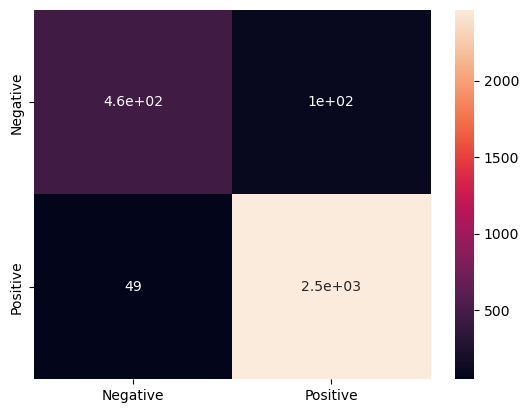

In [21]:
from sklearn import metrics
import seaborn as sns
#pred = voting.predict(x_test_tfidf)
cm=metrics.confusion_matrix(Y_test, y_test_pred)
cm = pd.DataFrame(cm, index = ["Negative", "Positive"], columns=["Negative", "Positive"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix for Reviews Classifier")

In [22]:
# Analyzing the results
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'precision': 0.9037328094302554,
  'recall': 0.8170515097690941,
  'f1-score': 0.8582089552238806,
  'support': 563},
 '1': {'precision': 0.9598597038191738,
  'recall': 0.9804936305732485,
  'f1-score': 0.9700669554942892,
  'support': 2512},
 'accuracy': 0.9505691056910569,
 'macro avg': {'precision': 0.9317962566247147,
  'recall': 0.8987725701711713,
  'f1-score': 0.9141379553590849,
  'support': 3075},
 'weighted avg': {'precision': 0.9495834626676418,
  'recall': 0.9505691056910569,
  'f1-score': 0.9495869378838047,
  'support': 3075}}

By using the SVM Classifier we got an accuracy of 94.43%

In [23]:
# Logistic Regression is implemented using sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, solver='saga')

In [24]:
# Fit the training data to the model
clf.fit(tf_x_train, Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [25]:
# Predicting the test data
y_test_pred=clf.predict(tf_x_test)

In [26]:
# Analyzing the report
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_test_pred, output_dict=True)
report

{'0': {'precision': 0.9633802816901409,
  'recall': 0.6074600355239786,
  'f1-score': 0.7450980392156863,
  'support': 563},
 '1': {'precision': 0.91875,
  'recall': 0.9948248407643312,
  'f1-score': 0.9552752293577982,
  'support': 2512},
 'accuracy': 0.9239024390243903,
 'macro avg': {'precision': 0.9410651408450704,
  'recall': 0.801142438144155,
  'f1-score': 0.8501866342867422,
  'support': 3075},
 'weighted avg': {'precision': 0.9269213328753005,
  'recall': 0.9239024390243903,
  'f1-score': 0.916794007227714,
  'support': 3075}}

By using the LR classifier we got an accuracy of 92.20%

In [27]:
#from sklearn.feature_extraction.text import TfidfVectorizer
text_string = [' '.join(data['pre_process'])]
text_string

['good maybe bad cook night thing worth giving second chance sure id try unless area chickenbroccoli flavorless kung pao shrimp weak boneless sparerib bland good place awful really like mexican food place mexican food hubby went dinner tues busy tues excited seated quickly server gave u drink quickly downturn first chip salsa tasteless found better tasting salsa jar salsa grocery store also waited ridiculous minute food come ordered taco burrito one chicken enchilada simple freaking meal mean come take minute server gave u food finally never came back check needed anything else could even flag anyone refill water burrito taco bland edible chicken enchilada worst enchilada ever even eat red sauce tasted like old enchilada sauce sitting kitchen awhile done eating sat another minute server came table told like enchilada take check make one worst service restaurant experienced back good luck poblanos took car left headlight replaced oct price reasonable take car dec headlight installed cor

In [28]:
from wordcloud import STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import re

#text_string = re.sub('[^a-zA-Z]', '', str(text_string))
#print(text_string)

stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(stopwords = stop_words, min_word_length =4, background_color='white').generate(data['pre_process'].to_string())

Create a Word Cloud https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f; https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

(-0.5, 399.5, 199.5, -0.5)

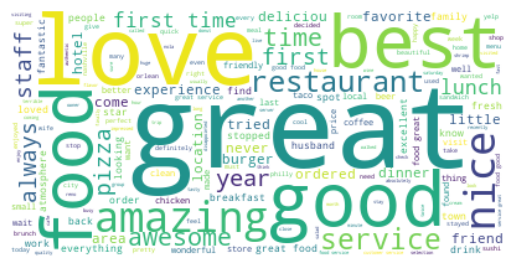

In [29]:

plt.imshow(text, interpolation='bilinear')
plt.axis("off")

In [30]:
# neg_reviews = data.loc[data['pre_process']]---- value 0, 
# pos_reviews = and another one for value 1

In [31]:
pos_reviews = data.loc[(data['label'] >= 1)]
pos_reviews.head()

text  stars  label  \
2300  Haven''t been getting out much since having hi...      5      1   
2301  I''ve always heard great things about their gr...      5      1   
2302  yum-my!! apple cobbler definately did it after...      5      1   
2303  Good times and great crowds at Grand Opening o...      4      1   
2304  Excellent place for a quick and casual breakfa...      5      1   

                                            pre_process  
2300  getting much since hip surgery massage lisa fa...  
2301  always heard great thing groothie tried giving...  
2302  yummy apple cobbler definately delicious dinne...  
2303  good time great crowd grand opening memorial d...  
2304  excellent place quick casual breakfast delicio...

In [32]:
neg_reviews = data.loc[(data['label'] == 0)]
neg_reviews.head()

text  stars  label  \
0  Not good! Maybe a bad cook or off night and mo...      1      0   
1  This place was awful. I really like Mexican fo...      1      0   
2  I took my car to have the left headlight repla...      1      0   
3  Rooms were nice and clean.  But staff was unpr...      2      0   
4  Eat there about every two weeks and it is eith...      2      0   

                                         pre_process  
0  good maybe bad cook night thing worth giving s...  
1  place awful really like mexican food place mex...  
2  took car left headlight replaced oct price rea...  
3  room nice clean staff unprofessional uncaring ...  
4  eat every two week either training store kind ...

In [33]:
pos_text_string = [' '.join(pos_reviews['pre_process'])]
pos_text_string

['getting much since hip surgery massage lisa facial erin definitely going back always heard great thing groothie tried giving smoothiegasm love one time served roomtemperature awkward putting really like warm smoothy though people may mind personally think pay good money bothered came back another day another try realized fell love groothie chilled yet try good like vibe place though lot positivity yummy apple cobbler definately delicious dinner across street must come back next time visiting ca good time great crowd grand opening memorial day weekend another good addition local craft beer scene current beer selection include wheat stout ipa seasonal ipa beer slightly stronger ranging abv ambiance taproom nice wooden interior large garage door give airy feel also good view inside fermenters beer brewed one note taproom artwork artwork one shown first friday think aim use space display work local artist tried stout visit grand opening good flavor w coffee undertone hope make back try b

In [34]:
pd.options.display.max_colwidth = 10000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

L = pos_text_string

#create new df 
pos_df = pd.DataFrame({'col':pos_text_string})
print (pos_df)

(-0.5, 399.5, 199.5, -0.5)

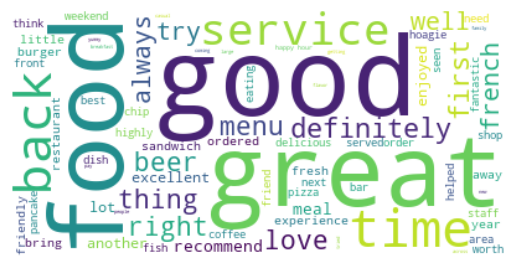

In [35]:

stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(max_words=75, stopwords = stop_words, min_word_length =3, background_color='white').generate(pos_df['col'].to_string())
plt.imshow(text, interpolation='bilinear')
plt.axis("off")


In [36]:
neg_text_string = [' '.join(neg_reviews['pre_process'])]
neg_text_string

['good maybe bad cook night thing worth giving second chance sure id try unless area chickenbroccoli flavorless kung pao shrimp weak boneless sparerib bland good place awful really like mexican food place mexican food hubby went dinner tues busy tues excited seated quickly server gave u drink quickly downturn first chip salsa tasteless found better tasting salsa jar salsa grocery store also waited ridiculous minute food come ordered taco burrito one chicken enchilada simple freaking meal mean come take minute server gave u food finally never came back check needed anything else could even flag anyone refill water burrito taco bland edible chicken enchilada worst enchilada ever even eat red sauce tasted like old enchilada sauce sitting kitchen awhile done eating sat another minute server came table told like enchilada take check make one worst service restaurant experienced back good luck poblanos took car left headlight replaced oct price reasonable take car dec headlight installed cor

In [37]:
pd.options.display.max_colwidth = 10000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

N = neg_text_string

#create new df 
neg_df = pd.DataFrame({'col':neg_text_string})
neg_df

col
0  good maybe bad cook night thing worth giving second chance sure id try unless area chickenbroccoli flavorless kung pao shrimp weak boneless sparerib bland good place awful really like mexican food place mexican food hubby went dinner tues busy tues excited seated quickly server gave u drink quickly downturn first chip salsa tasteless found better tasting salsa jar salsa grocery store also waited ridiculous minute food come ordered taco burrito one chicken enchilada simple freaking meal mean come take minute server gave u food finally never came back check needed anything else could even flag anyone refill water burrito taco bland edible chicken enchilada worst enchilada ever even eat red sauce tasted like old enchilada sauce sitting kitchen awhile done eating sat another minute server came table told like enchilada take check make one worst service restaurant experienced back good luck poblanos took car left headlight replaced oct price reasonable take car dec headlight installed correctly facing downward fixed charge back sears auto jan th headlight gone point blood boiling employee negligence get right st time although say charged would paid headlight already paid month ago headlight driver side replaced yr ago today replaced smdh never take car stay away small detail overlooked needle say get good customer service good distance home close work room nice clean staff unprofessional uncaring check immediately informed someone neighboring hotel shot killed front desk clerk nervous area arrived back room long day young kid called inquire room cleanedtowels replaced informed housekeeping weekend circumstance would anyone bring towel check credit card processed desk littered stale pizza crust stomach thought returning area free breakfast morning went bad staffservice better room layout furnishing actually really nice otherwise would enjoyed stay eat every two week either training store kind weak store area food either super hot cool last time went drive thu told guy large size order large size diet coke got charged received small fry small coke stated paid large filled large cup give large fry apologetic mistake either terrible mixed drink table got four different drink like drink got desert highball smelled like fruit mix spoiled top bland totally watered absolutely terrible customer service sure ranting asked happy hour menu one visit lady bartender said happy hour would get menu ordered fried pickle beer menu went pay bill hour later dude long beard behind bar rung bill normal price overpriced said order put looked like total jerk forgiveness told led believe happy hour needle say tip went back day later shockingly ordered cocktail simple old fashioned brandy asked soco asked brandy cocktail good get bill later cocktail real even oz cocktail like oz bogus charge unaware ordering long bearded guy behind bar told fact something adding higher liquor quantity wanted first place forgiveness forced pay bill zero tip otherwise get takeout beer outdoor couch ok customer service really blow slow unforgiving confusing hope long bearded guy manager pathetic previous location tried phat bite dirty gross literally saw guy mixing potato salad bare hand wipe nose return mixing year later new location decided give another chance concede said new cook morning oh food bland undercooked overall gross bad enough environment reminiscent garage sale turned restaurant item kept original condition failing clean top overall dirty icing dirty cake server call kind unaware menu act like burden help need training one guy way concerned air drumming attending drink order bunch young people poorly trained making gross food dirty environment cheap provide real silverware even salt shaker way overpriced got pay crap experience seriously let place overtaken mold likely growing corner room thank never return place terrible service friend waited least half hour drink front bar ignored time time time kept waving bar tender however seemed high horse served e

(-0.5, 399.5, 199.5, -0.5)

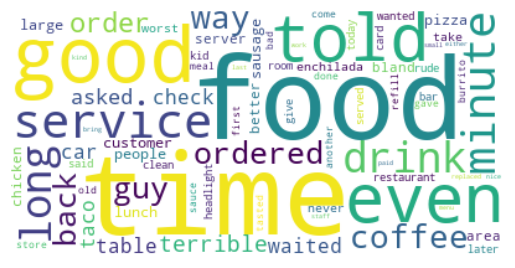

In [38]:
stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(max_words=75, stopwords = stop_words, min_word_length =3, background_color='white').generate(neg_df['col'].to_string())
plt.imshow(text, interpolation='bilinear')
plt.figure
plt.axis("off")

In [39]:
neg_df['col'].value_counts()

good maybe bad cook night thing worth giving second chance sure id try unless area chickenbroccoli flavorless kung pao shrimp weak boneless sparerib bland good place awful really like mexican food place mexican food hubby went dinner tues busy tues excited seated quickly server gave u drink quickly downturn first chip salsa tasteless found better tasting salsa jar salsa grocery store also waited ridiculous minute food come ordered taco burrito one chicken enchilada simple freaking meal mean come take minute server gave u food finally never came back check needed anything else could even flag anyone refill water burrito taco bland edible chicken enchilada worst enchilada ever even eat red sauce tasted like old enchilada sauce sitting kitchen awhile done eating sat another minute server came table told like enchilada take check make one worst service restaurant experienced back good luck poblanos took car left headlight replaced oct price reasonable take car dec headlight installed corre

In [40]:
# https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
# https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe
# Looking up how to create a wordcloud based on word frequency
d = {}
for a, x in neg_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Look at an article to figure out word frequency: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

# create a dictionary of word frequencies
text = ' '.join(neg_text_string) # create string out of a list
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
# 
#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()